In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [ ]:
from analysis import (load_and_clean_data,plot_time_series,decompose_time_series,annotate_events,
                      arima_forecast,garch_forecast)

ImportError: cannot import name 'Tester' from 'numpy.testing' (c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_10\TimeSeries-Change_Point_Detection\venv\Lib\site-packages\numpy\testing\__init__.py)

In [4]:
# Load the data (assuming the file is in the working directory)
df = pd.read_csv('../data/BrentOilPrices.csv')
df.head()


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [5]:
df_cleaned = load_and_clean_data(df)


NameError: name 'load_and_clean_data' is not defined

In [3]:
# Drop rows with missing values in Date or Price columns
df = df.dropna(subset=['Date', 'Price'])

# Check for duplicate dates and handle them if necessary
df = df.drop_duplicates(subset=['Date'])


In [4]:
# Sort the data by date
df = df.sort_values(by='Date').reset_index(drop=True)

# Display basic information about the data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None
        Date  Price
0  01-Apr-02  26.06
1  01-Apr-03  27.94
2  01-Apr-04  32.59
3  01-Apr-05  54.14
4  01-Apr-08  98.69


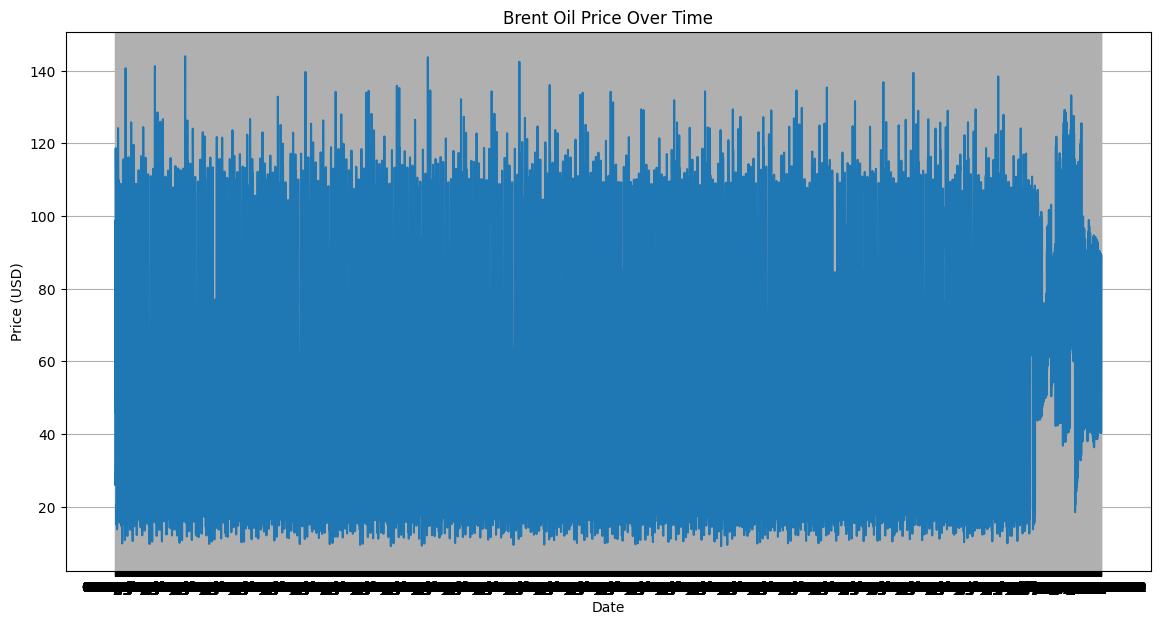

In [5]:
# Plot the historical Brent oil price trend
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Price Over Time')
plt.grid(True)
plt.show()

In [7]:
# Descriptive statistics
print(df['Price'].describe())

count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64


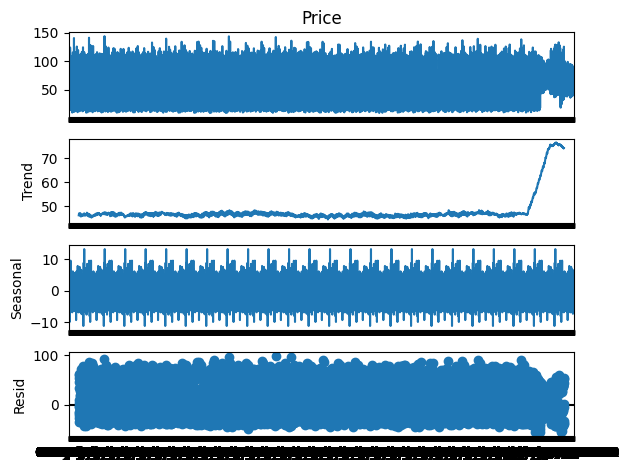

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df.set_index('Date')['Price'], model='additive', period=365)
result.plot()
plt.show()



In [9]:
events = {
    '1987-10-19': 'Black Monday Stock Market Crash',
    '1990-08-02': 'Gulf War begins as Iraq invades Kuwait',
    '1991-01-17': 'Operation Desert Storm begins in Kuwait',
    '1997-07-02': 'Asian Financial Crisis begins in Southeast Asia',
    '1998-08-17': 'Russian Financial Crisis impacts global commodity markets',
    '1999-03-23': 'OPEC agrees to production cuts to counter low oil prices',
    '2001-09-11': 'September 11 Attacks in the U.S. create market uncertainty',
    '2002-12-01': 'Venezuela general strike affects oil exports',
    '2003-03-20': 'Iraq War begins, impacting Middle East oil supply routes',
    '2004-10-23': 'China’s oil demand surges, driving global price increases',
    '2005-08-29': 'Hurricane Katrina disrupts oil production in Gulf of Mexico',
    '2006-07-12': 'Israel-Lebanon conflict creates supply disruptions',
    '2007-01-01': 'Russia briefly cuts oil supply to Belarus, affecting Europe',
    '2007-10-11': 'Global Financial Crisis precursor as stock markets start decline',
    '2008-07-11': 'Oil price peaks at over $147 per barrel due to demand and speculation',
    '2008-09-15': 'Lehman Brothers collapse intensifies Global Financial Crisis',
    '2009-01-01': 'OPEC production cuts begin as a response to financial crisis',
    '2010-04-20': 'BP Deepwater Horizon oil spill in Gulf of Mexico',
    '2010-09-15': 'U.S. enacts Dodd-Frank Act impacting energy commodity speculation',
    '2011-01-25': 'Arab Spring leads to political instability across the Middle East',
    '2011-03-11': 'Japan earthquake and tsunami impacts energy demand and supply',
    '2012-07-01': 'European Union imposes oil embargo on Iran',
    '2014-02-20': 'Ukraine Crisis and sanctions on Russia affect oil supply chains',
    '2014-06-05': 'ISIS gains control of key regions in Iraq, affecting oil production',
    '2014-11-27': 'OPEC decides against production cuts despite falling prices',
    '2015-08-11': 'China devalues yuan, leading to concerns over global demand',
    '2015-11-30': 'Paris Climate Agreement affects long-term fossil fuel policies',
    '2016-01-16': 'U.S. lifts sanctions on Iran, adding oil supply back to the market',
    '2017-06-05': 'Qatar Diplomatic Crisis with neighboring Gulf states',
    '2017-08-25': 'Hurricane Harvey impacts oil production and refining in Texas',
    '2018-05-08': 'U.S. withdraws from Iran nuclear deal, reimposing sanctions',
    '2018-11-04': 'Full U.S. sanctions on Iranian oil exports come into effect',
    '2019-09-14': 'Drone attacks on Saudi Aramco facilities disrupt oil supply',
    '2020-03-09': 'OPEC+ price war between Russia and Saudi Arabia',
    '2020-03-11': 'WHO declares COVID-19 a pandemic, global lockdowns ensue',
    '2020-04-20': 'West Texas Intermediate oil price turns negative due to oversupply',
    '2021-02-15': 'Texas Winter Storm disrupts oil production in the U.S.',
    '2021-06-30': 'OPEC+ agreement on gradual production increase as demand recovers',
    '2021-08-15': 'Taliban takes control of Afghanistan, increasing regional instability',
    '2022-02-24': 'Russia invades Ukraine, triggering sanctions on Russian oil',
    '2022-06-08': 'EU announces phased oil embargo on Russia amid Ukraine crisis',
}
# Convert the events dictionary to a DataFrame
events_df = pd.DataFrame(list(events.items()), columns=['Date', 'Event'])



In [10]:
# Convert the 'Date' columns to datetime format in both DataFrames
df['Date'] = pd.to_datetime(df['Date'])
events_df['Date'] = pd.to_datetime(events_df['Date'])

# Merge the events DataFrame with the main DataFrame on 'Date'
df = pd.merge(df, events_df, on='Date', how='left')

# Display the first few rows of the merged DataFrame to confirm the merge
print(df.head())

C:\Users\ftesfaye\AppData\Local\Temp\ipykernel_5704\922226041.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


        Date  Price Event
0 2002-04-01  26.06   NaN
1 2003-04-01  27.94   NaN
2 2004-04-01  32.59   NaN
3 2005-04-01  54.14   NaN
4 2008-04-01  98.69   NaN


In [11]:
# Filter the DataFrame to include only rows with events
events_only_df = df[df['Event'].notna()]

# Display the resulting DataFrame
print(events_only_df)


           Date   Price                                              Event
288  1990-08-02   22.25             Gulf War begins as Iraq invades Kuwait
380  1997-07-02   18.83    Asian Financial Crisis begins in Southeast Asia
1212 2014-06-05  108.43  ISIS gains control of key regions in Iraq, aff...
1214 2017-06-05   48.25  Qatar Diplomatic Crisis with neighboring Gulf ...
2095 2018-05-08   74.16  U.S. withdraws from Iran nuclear deal, reimpos...
2349 2020-03-09   35.33    OPEC+ price war between Russia and Saudi Arabia
2767 2015-08-11   47.33  China devalues yuan, leading to concerns over ...
2858 2008-07-11  143.68  Oil price peaks at over $147 per barrel due to...
2905 2011-03-11  114.07  Japan earthquake and tsunami impacts energy de...
2911 2020-03-11   34.45  WHO declares COVID-19 a pandemic, global lockd...
2972 2007-10-11   80.83  Global Financial Crisis precursor as stock mar...
2991 2001-09-11   29.12  September 11 Attacks in the U.S. create market...
3136 2006-07-12   73.04  

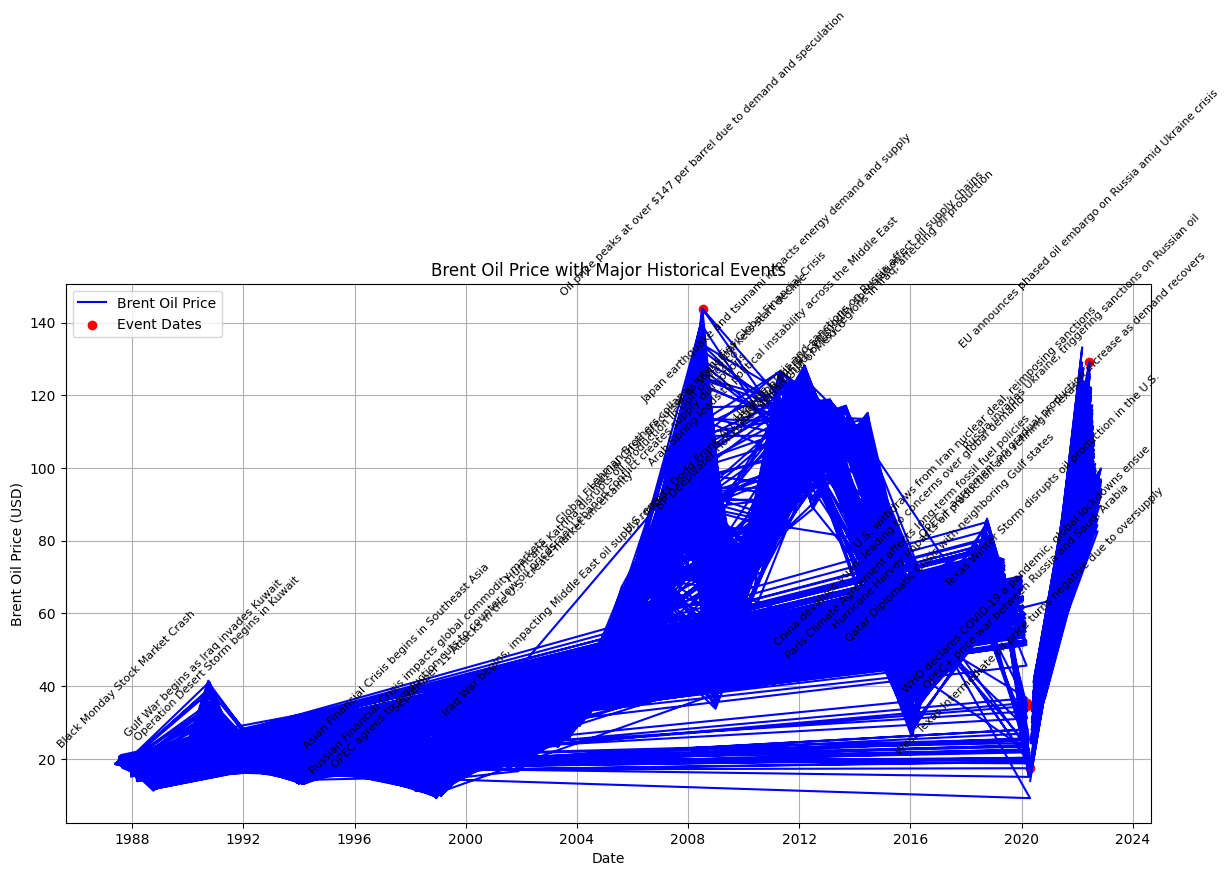

In [12]:
import matplotlib.pyplot as plt

# Line plot for Brent oil prices
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price', color='blue')

# Highlight event dates on the line graph
events_only_df = df[df['Event'].notna()]
plt.scatter(events_only_df['Date'], events_only_df['Price'], color='red', marker='o', label='Event Dates')

# Annotate events on the graph
for i, row in events_only_df.iterrows():
    plt.annotate(row['Event'], (row['Date'], row['Price']),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, rotation=45)

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Brent Oil Price (USD)')
plt.title('Brent Oil Price with Major Historical Events')
plt.legend()
plt.grid()

plt.show()


In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (after choosing the best p, d, q parameters)
model = ARIMA(df['Price'], order=(5, 1, 0))  # Example order; fine-tune based on your data
arima_result = model.fit()

# Forecast the next 30 days
forecast = arima_result.forecast(steps=30)
print(forecast)


9011    86.690047
9012    75.591681
9013    83.335274
9014    89.208608
9015    86.836567
9016    83.930289
9017    85.921466
9018    87.947254
9019    87.064211
9020    86.121828
9021    86.733597
9022    87.372032
9023    87.081680
9024    86.766826
9025    86.960167
9026    87.161711
9027    87.066846
9028    86.962934
9029    87.023974
9030    87.088190
9031    87.057210
9032    87.023193
9033    87.042497
9034    87.063055
9035    87.052977
9036    87.041883
9037    87.048008
9038    87.054606
9039    87.051340
9040    87.047731
Name: predicted_mean, dtype: float64


In [14]:
from arch import arch_model

# Fit a GARCH model
garch_model = arch_model(df['Price'], vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp="off")

# Display model summary and forecast volatility
print(garch_result.summary())
vol_forecast = garch_result.forecast(horizon=30).variance[-1:]
print(vol_forecast)


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -42358.1
Distribution:                  Normal   AIC:                           84724.2
Method:            Maximum Likelihood   BIC:                           84752.7
                                        No. Observations:                 9011
Date:                Sat, Nov 02 2024   Df Residuals:                     9010
Time:                        11:13:20   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            19.2819      0.254     75.808      0.000 [ 18.783, 19.78

In [15]:
import pymc3 as pm

# Define a simple changepoint detection model using PyMC3
with pm.Model() as model:
    # Priors for changepoint position and scale
    switchpoint = pm.DiscreteUniform('switchpoint', lower=0, upper=len(df['Price']) - 1)
    early_mean = pm.Normal('early_mean', mu=df['Price'].mean(), sd=10)
    late_mean = pm.Normal('late_mean', mu=df['Price'].mean(), sd=10)
    
    # Observed data with changepoint
    idx = np.arange(len(df['Price']))
    mean = pm.math.switch(switchpoint >= idx, early_mean, late_mean)
    observed = pm.Normal('observed', mu=mean, sd=1, observed=df['Price'])
    
    # Sample the posterior
    trace = pm.sample(1000, cores=1)
    
# Plot the results
pm.traceplot(trace)
plt.show()


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


ImportError: cannot import name 'Tester' from 'numpy.testing' (c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_10\TimeSeries-Change_Point_Detection\venv\Lib\site-packages\numpy\testing\__init__.py)

In [16]:
from arch import arch_model

garch_model = arch_model(df['Price'], vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')
print(garch_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -42358.1
Distribution:                  Normal   AIC:                           84724.2
Method:            Maximum Likelihood   BIC:                           84752.7
                                        No. Observations:                 9011
Date:                Sat, Nov 02 2024   Df Residuals:                     9010
Time:                        11:36:31   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            19.2819      0.254     75.808      0.000 [ 18.783, 19.78